In [41]:
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [42]:
from matplotlib import rc
rc('font', family = 'Arial Unicode MS')

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from glob import glob
import pandas as pd

#헬스관련 자료를 합침

dfs=[]
file_list = glob('./EDA_data/1. health/*.csv')
for each_file in file_list:
    df = pd.read_csv(each_file)
    dfs.append(df)
    
df = pd.concat(dfs)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN


In [45]:
#인도 자료만 뽑아 봄

df_total_ind = df[df['LOCATION'] =='IND']
df_total_ind.reset_index(drop = True, inplace = True)
df_total_ind['INDICATOR'].unique()

array(['ALCOHOL', 'HOSPITALBED', 'MEDICALDOC', 'POLLUTIONEXP', 'LIFEEXP',
       'INFANTMORTALITY'], dtype=object)

In [46]:
#2017년도 자료를 뽑음

df_2017 = df[df['TIME'] == 2017]
df_2017.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
57,AUS,ALCOHOL,TOT,LT_CAP15,A,2017,9.5,NaN
115,AUT,ALCOHOL,TOT,LT_CAP15,A,2017,12.1,NaN
171,BEL,ALCOHOL,TOT,LT_CAP15,A,2017,9.4,NaN
230,CAN,ALCOHOL,TOT,LT_CAP15,A,2017,8.2,NaN
269,CZE,ALCOHOL,TOT,LT_CAP15,A,2017,11.6,D


In [47]:
#SUBJECT의 평균을 구해줌

df_2017 = pd.DataFrame(df_2017.groupby(['LOCATION', 'INDICATOR']).mean())
df_2017.reset_index(inplace=True)
df_2017

,LOCATION,INDICATOR,TIME,Value
0,AFG,POLLUTIONEXP,2017,78.984295
1,AGO,POLLUTIONEXP,2017,66.254160
2,ALB,POLLUTIONEXP,2017,58.818040
3,ARE,POLLUTIONEXP,2017,70.042080
4,ARG,POLLUTIONEXP,2017,55.119270
...,...,...,...,...
366,ZAF,INFANTMORTALITY,2017,29.600000
367,ZAF,LIFEEXP,2017,63.633333
368,ZAF,POLLUTIONEXP,2017,62.459445
369,ZMB,POLLUTIONEXP,2017,63.872210


In [48]:
# 미국만 뽑아 봄
df_usa = df_2017[df_2017["LOCATION"] == 'USA']
df_usa

,LOCATION,INDICATOR,TIME,Value
354,USA,ALCOHOL,2017,8.90000
355,USA,HOSPITALBED,2017,1.87000
356,USA,INFANTMORTALITY,2017,5.80000
357,USA,LIFEEXP,2017,78.60000
358,USA,MEDICALDOC,2017,2.61000
359,USA,POLLUTIONEXP,2017,5.25571


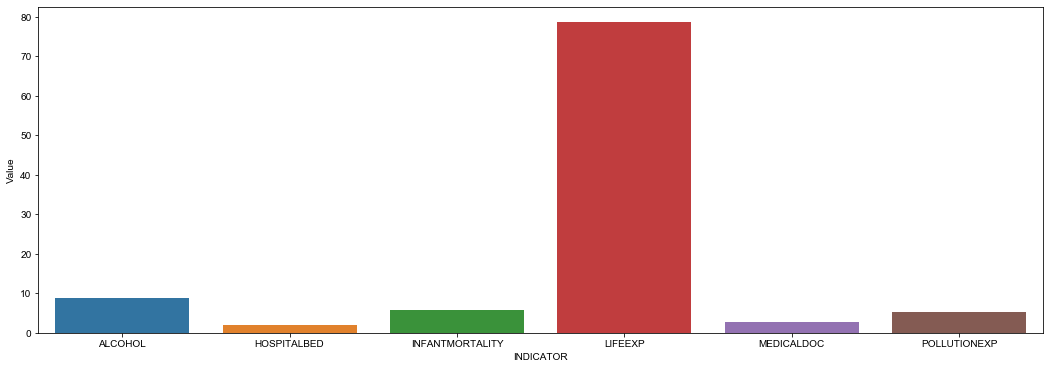

In [49]:
#미국 헬스관련 영역을 그래프로 그려 봄
plt.figure(figsize=(18,6))
sns.barplot(x= 'INDICATOR', y='Value', data = df_usa)


In [50]:

#알콜 소비량을 뽑아 봄
df_alcohol= df_2017[df_2017["INDICATOR"] =='ALCOHOL']
df_alcohol = df_alcohol.sort_values(by ='Value', ascending = False)

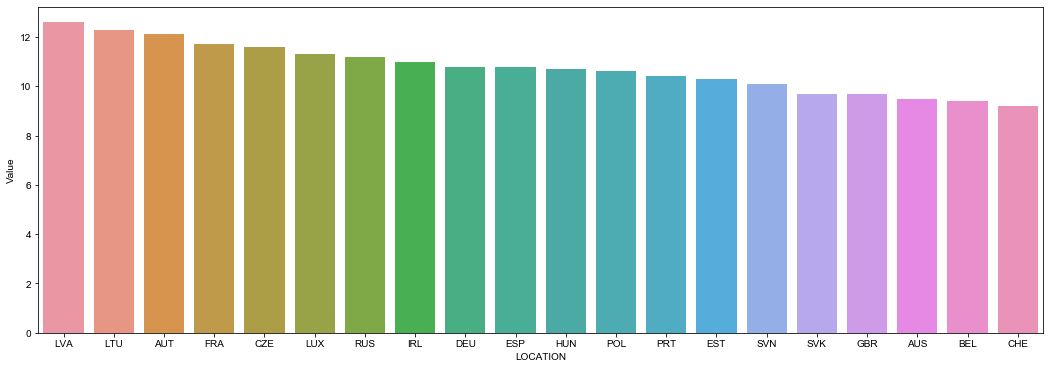

In [51]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[:20])

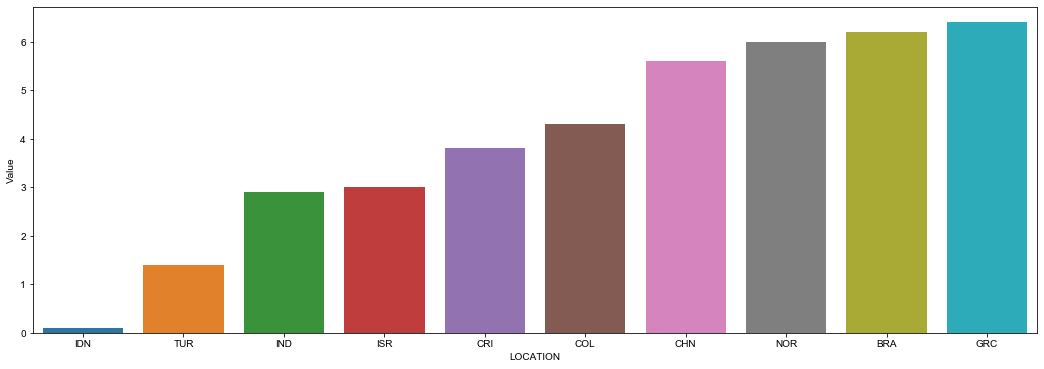

In [14]:
#알콜소비량을 반대로 뽑아봄

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[::-1][:10])

#알콜 소비량은 하위권으로 나타남(종교적인 영향) 그렇다면 먹는거 중에 인도가 꼴찌인 것은 무엇일까? 이유는?

In [15]:
# 고기소비량만 따로 뽑아 봄

df_meat = pd.read_csv('./EDA_data/meat_2017.csv')
df_meat = df_meat[['LOCATION','SUBJECT','TIME','Value']]

# df_meat = pd.DataFrame(df_meat.pivot_table('Value','LOCATION','SUBJECT'))

df_meat
# df_meat.reset_index(inplace = True)
# df_meat
# df_meat = df_meat.sort_values(by =['BEEF',"PIG",'POULTRY','SHEEP'], ascending = False)
# df_meat
# df_meat = df_meat.columns.droplevel([0,1])

# df_meat_ind = df_meat[(df_meat['LOCATION'] =='IND') & (df_meat['TIME'] ==2017)]
# df_meat_ind

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,2017,21.251
1,AUS,PIG,2017,22.062
2,AUS,POULTRY,2017,43.349
3,AUS,SHEEP,2017,7.755
4,CAN,BEEF,2017,18.273
...,...,...,...,...
135,CHE,SHEEP,2017,1.203
136,GBR,BEEF,2017,11.706
137,GBR,PIG,2017,16.626
138,GBR,POULTRY,2017,27.048


In [36]:
df_meat_pivot = pd.DataFrame(df_meat.pivot_table('Value','LOCATION','SUBJECT'))
df_meat_pivot = df_meat_pivot.sort_values(by = 'BEEF', ascending = False)

df_meat_pivot.head()

SUBJECT,BEEF,PIG,POULTRY,SHEEP
LOCATION,,,,
ARG,39.575,10.421,38.343,0.969
USA,25.939,22.893,48.901,0.480
BRA,25.373,12.149,40.906,0.532
AUS,21.251,22.062,43.349,7.755
ISR,20.909,1.354,66.213,1.480


In [17]:
# 학원생들에게 물어봅니다. 당신은 소고기 좋아하는 사람 손? 돼지고기 좋아하는 사람 손? 닭고기 좋아하는 사람 손? 양고기 먹으러 가는 사람 손?

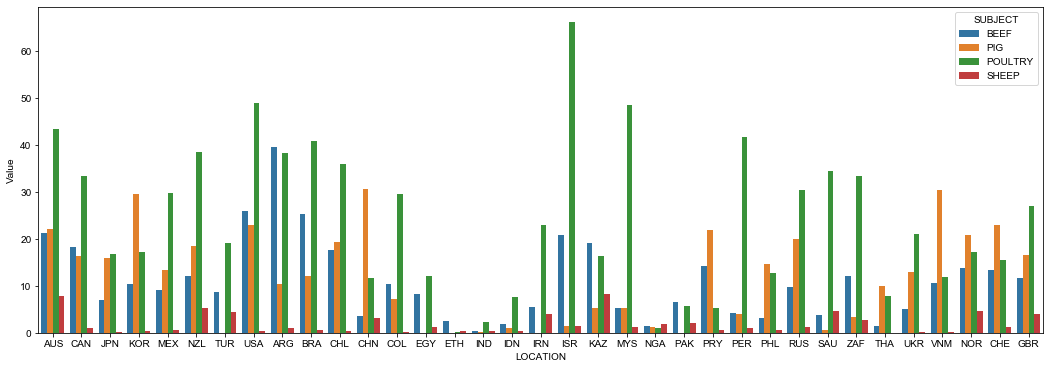

In [18]:
plt.figure(figsize=(18,6))
sns.barplot(x ='LOCATION', y ="Value", hue = 'SUBJECT', data = df_meat);

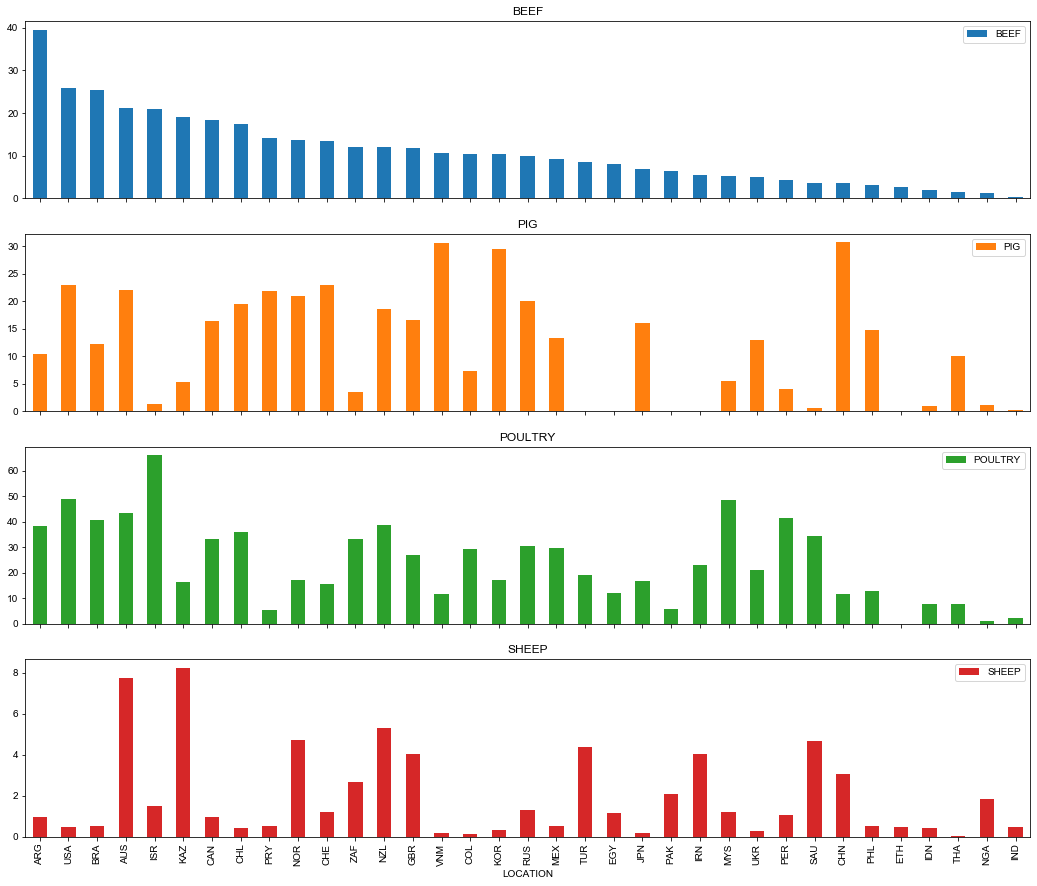

In [19]:
# plt.figure(figsize=(18,6))

df_meat_pivot.plot(kind='bar',subplots=True, figsize=(18,15));

In [39]:
df_meat_pivot["BEEF"] + df_meat_pivot['PIG'] + df_meat_pivot['POULTRY'] + df_meat_pivot['SHEEP']

LOCATION
ARG    89.308
USA    98.213
BRA    78.960
AUS    94.417
ISR    89.956
KAZ    49.107
CAN    69.031
CHL    73.353
PRY    41.836
NOR    56.424
CHE    53.070
ZAF    51.506
NZL    74.500
GBR    59.410
VNM    53.145
COL    47.344
KOR    57.465
RUS    61.639
MEX    52.781
TUR    32.138
EGY    21.482
JPN    39.993
PAK    14.419
IRN    32.589
MYS    60.325
UKR    39.357
PER    51.104
SAU    43.435
CHN    49.008
PHL    31.127
ETH     3.210
IDN    11.001
THA    19.305
NGA     5.266
IND     3.400
dtype: float64

AttributeError: 'Rectangle' object has no property 'sort'

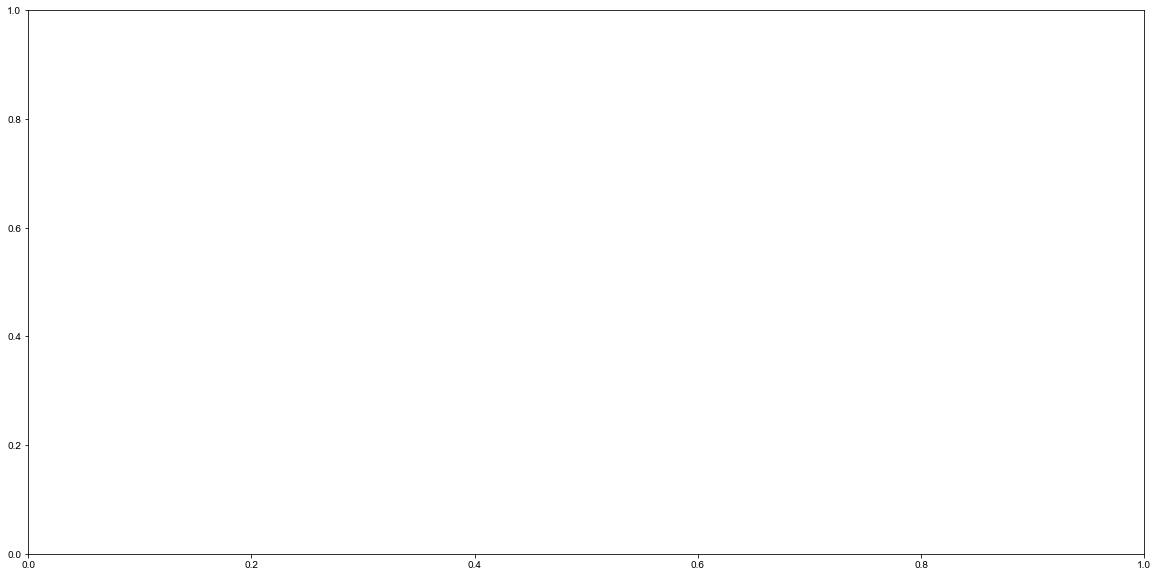

In [40]:
df_meat_pivot.plot(kind='bar', stacked = True, figsize=(20,10), sort = df_meat_pivot["BEEF"] + df_meat_pivot['PIG'] + df_meat_pivot['POULTRY'] + df_meat_pivot['SHEEP'])

In [ ]:
df_meat_pivot[-10:].plot(kind='bar', stacked = True, figsize=(20,10));

In [ ]:
# 유아사망율을 뽑아 봄

df_infant= df_2017[df_2017["INDICATOR"] =='INFANTMORTALITY']
df_infant = df_infant.sort_values(by ='Value', ascending = False)

In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x= 'LOCATION', y='Value', data = df_infant[:15])
plt.title("영유아 사망율");

#인도의 유아사망율이 가장 높음

In [ ]:
# 더 깊숙히 들어가 보고자 인도의 헬스관련 자료를 탐색함
df_ind = df_2017[df_2017["LOCATION"] == 'IND']
df_ind.reset_index(drop=True, inplace = True)
df_ind

In [ ]:
plt.figure(figsize=(15,4))
ind = sns.barplot(x= 'INDICATOR', y='Value', data = df_ind)
for i in range(df_ind.shape[0]):
    ind.text(x=i, y = df_ind['Value'][i], s=df_ind['Value'][i],fontsize=13, horizontalalignment='center')
plt.ylim(0,120)
plt.title("인도");

#알콜소비량은 적음(종교)
# 기대수명과 1000명당 의사수 공기오염도는 다른 나라와 비교해보자!

In [52]:
#오염 노출정도

df_pol= df_2017[df_2017["INDICATOR"] =='POLLUTIONEXP']
df_pol = df_pol.sort_values(by ='Value', ascending = False)

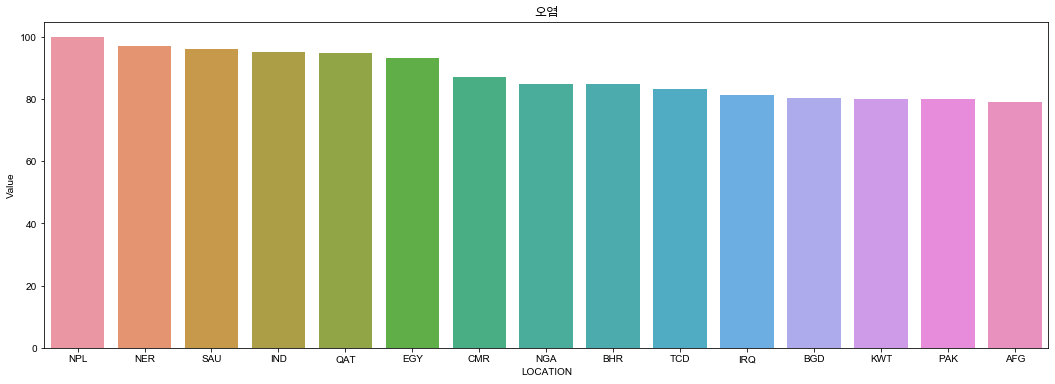

In [55]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_pol[:15])
plt.title("오염");
#인도가 4위

In [23]:
#1000명당 의사수

df_doc= df_2017[df_2017["INDICATOR"] =='MEDICALDOC']
df_doc = df_doc.sort_values(by ='Value', ascending = False)

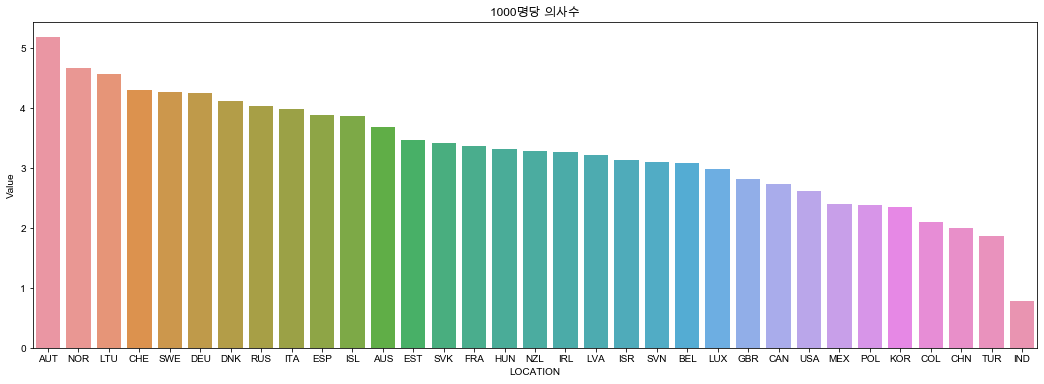

In [24]:

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_doc)
plt.title("1000명당 의사수");
#인도 꼴찌

In [25]:
# 1000명당 병상수를 출력해 봄

In [26]:
df_bed= df_2017[df_2017["INDICATOR"] =='HOSPITALBED']
df_bed = df_bed.sort_values(by ='Value', ascending = False)

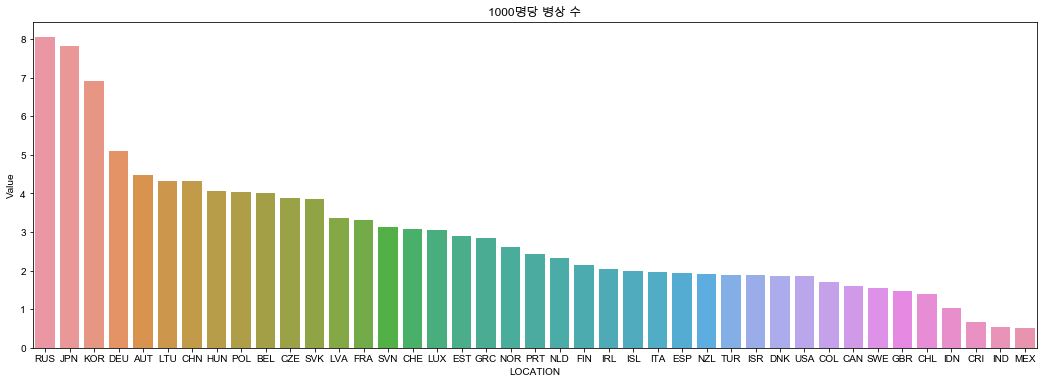

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_bed)
plt.title("1000명당 병상 수");

#꼴지에서 두번째

In [28]:
# 기대수명을 뽑아봄
df_life= df_2017[df_2017["INDICATOR"] =='LIFEEXP']
df_life = df_life.sort_values(by ='Value', ascending = False)

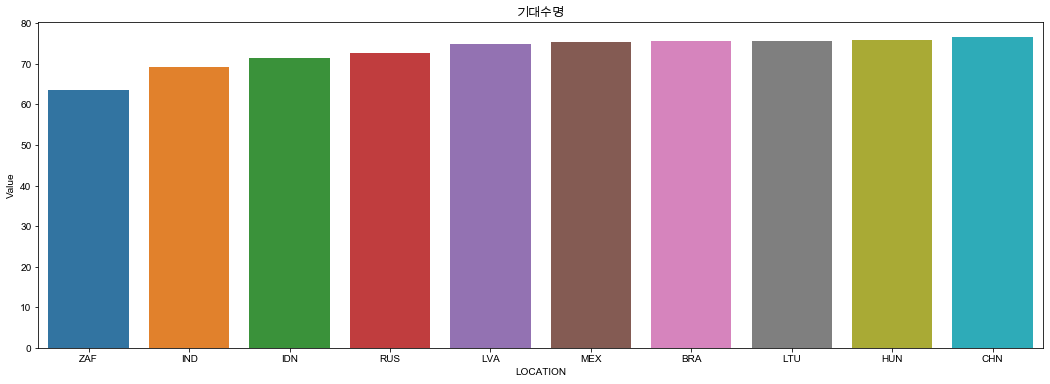

In [29]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_life[::-1][:10])
plt.title("기대수명");

# 뒤에서 두번째

In [30]:
# 인도의 상관관계 분석 해봄

In [31]:
df_total_ind= df_total_ind[['TIME','LOCATION','INDICATOR','Value']]

df_total_ind_tr = df_total_ind.pivot_table(index = 'TIME', columns = 'INDICATOR', values = 'Value')

df_total_ind_tr.head()

INDICATOR,ALCOHOL,HOSPITALBED,INFANTMORTALITY,LIFEEXP,MEDICALDOC,POLLUTIONEXP
TIME,,,,,,
1960,NaN,NaN,161.4,41.400000,NaN,NaN
1961,0.7,NaN,159.1,42.000000,NaN,NaN
1962,0.7,NaN,156.9,42.600000,NaN,NaN
1963,0.6,NaN,154.9,43.233333,NaN,NaN
1964,0.7,NaN,153.1,43.866667,NaN,NaN


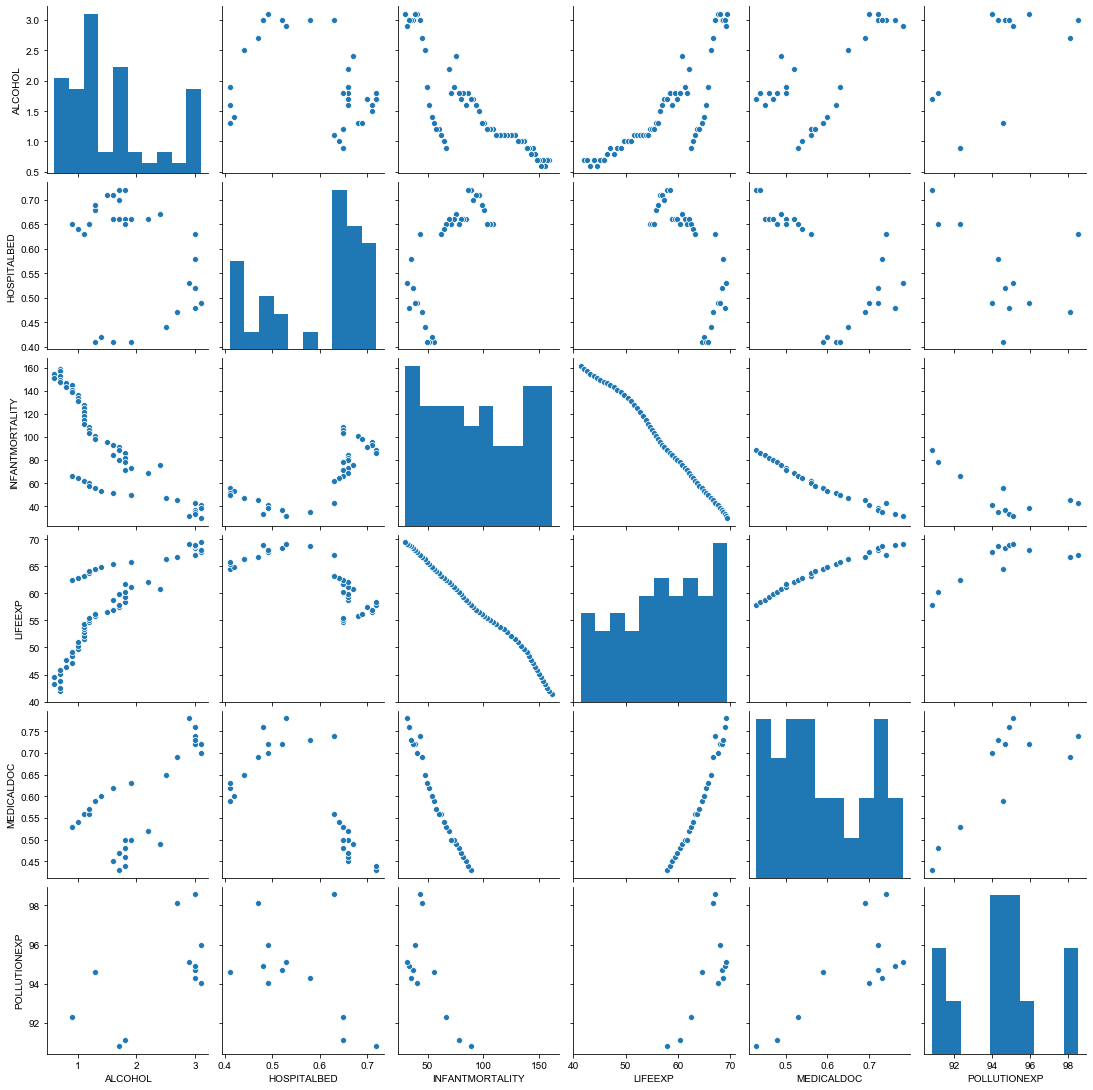

In [32]:
# pairplot으로 상관관계를 봄

sns.pairplot(df_total_ind_tr);

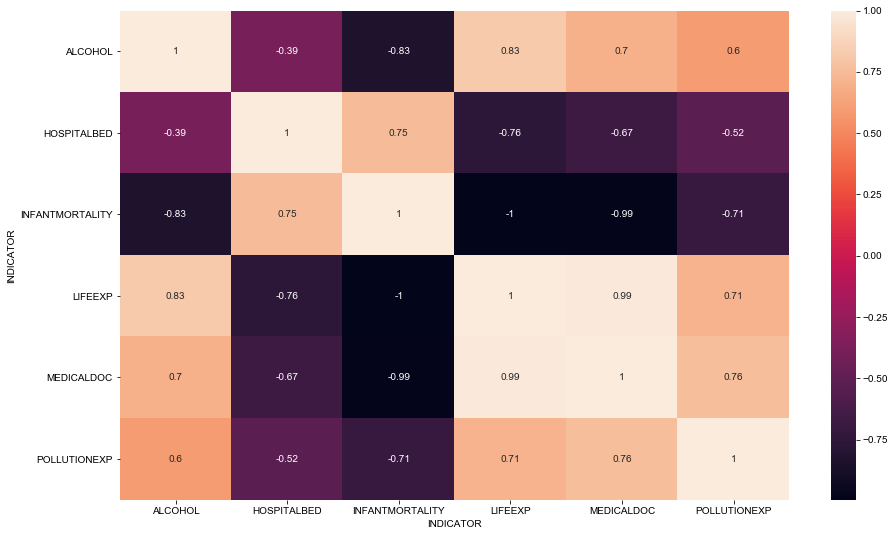

In [33]:
#히트맵으로 상관관계를 봄

plt.figure(figsize=(15,9))
sns.heatmap(df_total_ind_tr.corr(), annot =True)